In [1]:
import os
from pathlib import Path
from PIL import Image, UnidentifiedImageError
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset_path = Path("../data/train")

In [ ]:
output_dir = Path("../data_exploration")
output_dir.mkdir(parents=True, exist_ok=True)


In [3]:
def remove_corrupted_images(base_path):
    removed_files = []
    for class_folder in tqdm(base_path.iterdir(), desc="Checking for corrupted images"):
        if class_folder.is_dir():
            for img_path in class_folder.glob("*.jpg"):
                try:
                    img = Image.open(img_path)
                    img.verify()
                except (UnidentifiedImageError, OSError):
                    removed_files.append(str(img_path))
                    os.remove(img_path)
    print(f"\n✅ Removed {len(removed_files)} corrupted/unreadable images.")
    return removed_files

In [4]:
removed_images = remove_corrupted_images(dataset_path)

Checking for corrupted images: 38it [00:58,  1.55s/it]


✅ Removed 0 corrupted/unreadable images.


In [5]:
def analyze_brightness(image_path):
    img = Image.open(image_path).convert("L")
    return np.array(img).mean()

brightness_data = []

for class_folder in tqdm(dataset_path.iterdir(), desc="Analyzing brightness"):
    if class_folder.is_dir():
        for img_path in class_folder.glob("*.jpg"):
            try:
                brightness = analyze_brightness(img_path)
                brightness_data.append({
                    "class": class_folder.name,
                    "image": img_path.name,
                    "brightness": brightness
                })
            except:
                continue

Analyzing brightness: 38it [02:00,  3.18s/it]


In [6]:
brightness_df = pd.DataFrame(brightness_data)

In [7]:
brightness_df.to_csv("../data/brightness_distribution.csv", index=False)

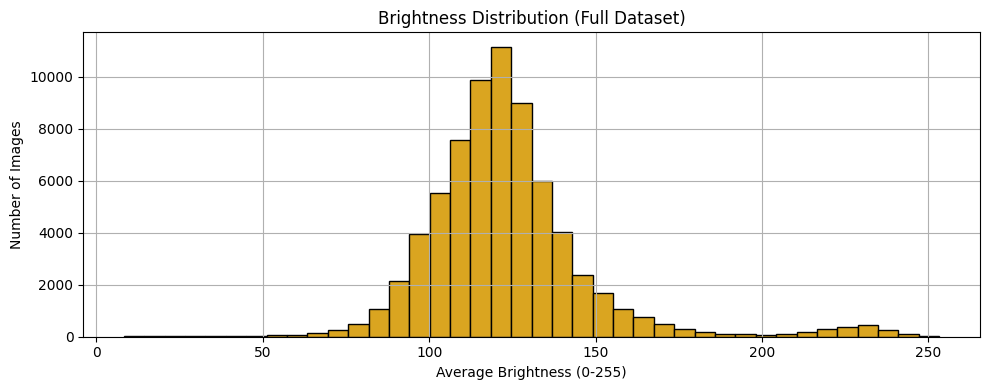

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 4))
plt.hist(brightness_df["brightness"], bins=40, color='goldenrod', edgecolor='black')
plt.title("Brightness Distribution (Full Dataset)")
plt.xlabel("Average Brightness (0-255)")
plt.ylabel("Number of Images")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(output_dir / "brightness_distribution.png") 

In [9]:
print("\nTop 5 darkest images:")
print(brightness_df.sort_values(by="brightness").head())

print("\nTop 5 brightest images:")
print(brightness_df.sort_values(by="brightness", ascending=False).head())


Top 5 darkest images:
                      class  \
59253  Tomato___Late_blight   
57728  Tomato___Late_blight   
57805  Tomato___Late_blight   
57806  Tomato___Late_blight   
58474  Tomato___Late_blight   

                                                   image  brightness  
59253  ed974f5b-e999-46a9-9e22-da51da2766b6___GHLB_PS...    8.246216  
57728  17fcb016-4663-4f95-bc0b-b40392235015___GHLB_PS...    9.073990  
57805  1f2dc4ae-5264-443a-a103-67fafb37bc70___GHLB_PS...    9.820343  
57806  1f2dc4ae-5264-443a-a103-67fafb37bc70___GHLB_PS...    9.874054  
58474  7b343a4c-5fbc-40f6-83da-ccae49ebd5fb___GHLB_PS...   10.304947  

Top 5 brightest images:
                         class  \
8772       Blueberry___healthy   
8570       Blueberry___healthy   
5500  Apple___Cedar_apple_rust   
4705  Apple___Cedar_apple_rust   
5314  Apple___Cedar_apple_rust   

                                                  image  brightness  
8772  5ab0b177-7f8c-45ad-a0b0-f9cff2a1abc0___RS_HL 2...  253.309

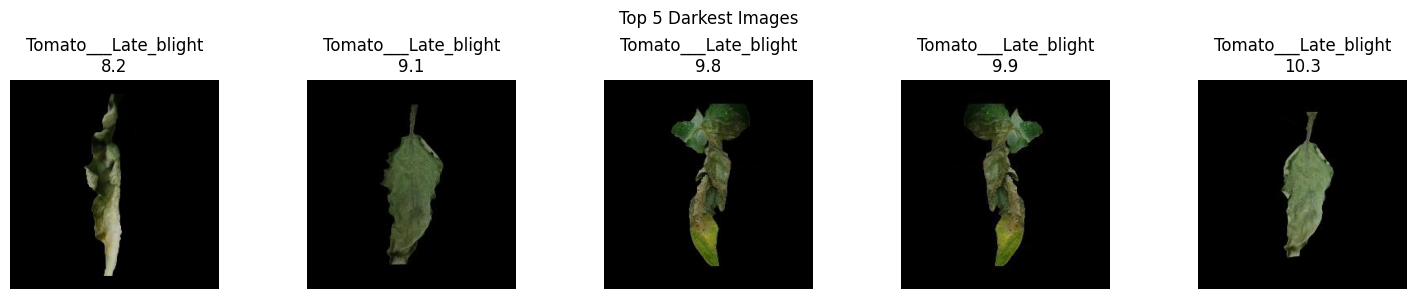

<Figure size 640x480 with 0 Axes>

In [17]:

# Displaying the top 5 darkest images
darkest = brightness_df.sort_values(by="brightness").head()

plt.figure(figsize=(15, 3))
for i, (_, row) in enumerate(darkest.iterrows(), 1):
    img_path = dataset_path / row['class'] / row['image']
    img = Image.open(img_path)
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(f"{row['class']}\n{round(row['brightness'], 1)}")
    plt.axis("off")
plt.suptitle("Top 5 Darkest Images")
plt.tight_layout()
plt.show()
plt.savefig(output_dir / "top_5_darkest_images.png")  # 🔥 SAVED

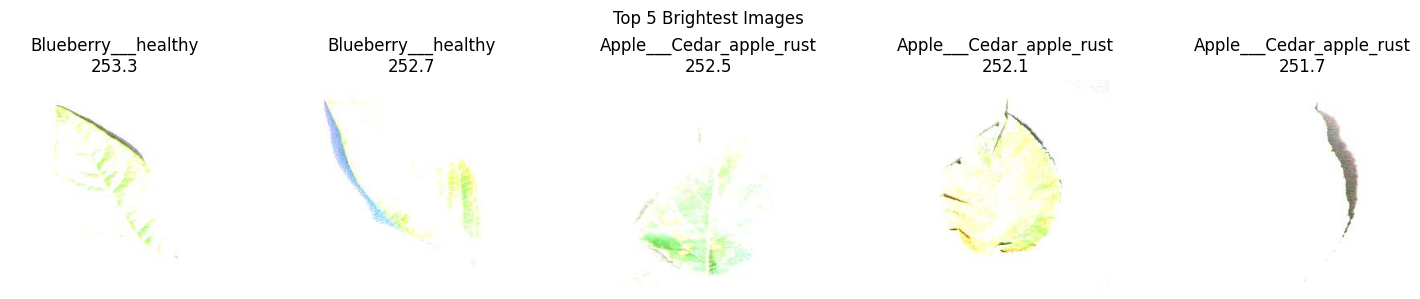

<Figure size 640x480 with 0 Axes>

In [18]:
brightest = brightness_df.sort_values(by="brightness", ascending=False).head()

plt.figure(figsize=(15, 3))
for i, (_, row) in enumerate(brightest.iterrows(), 1):
    img_path = dataset_path / row['class'] / row['image']
    img = Image.open(img_path)
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(f"{row['class']}\n{round(row['brightness'], 1)}")
    plt.axis("off")
plt.suptitle("Top 5 Brightest Images")
plt.tight_layout()
plt.show()
plt.savefig(output_dir / "top_5_brightest_images.png")  

